<a href="https://colab.research.google.com/github/sreeja814/AI-Resume-Portfolio-Builder/blob/main/Hand_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
digits = load_digits()
X,y = digits.data , digits.target
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state = 42)

In [ ]:
clf = RandomForestClassifier(n_estimators= 150 , random_state = 42)
clf.fit(X_train , y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
y_predict = clf.predict(X_test)
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



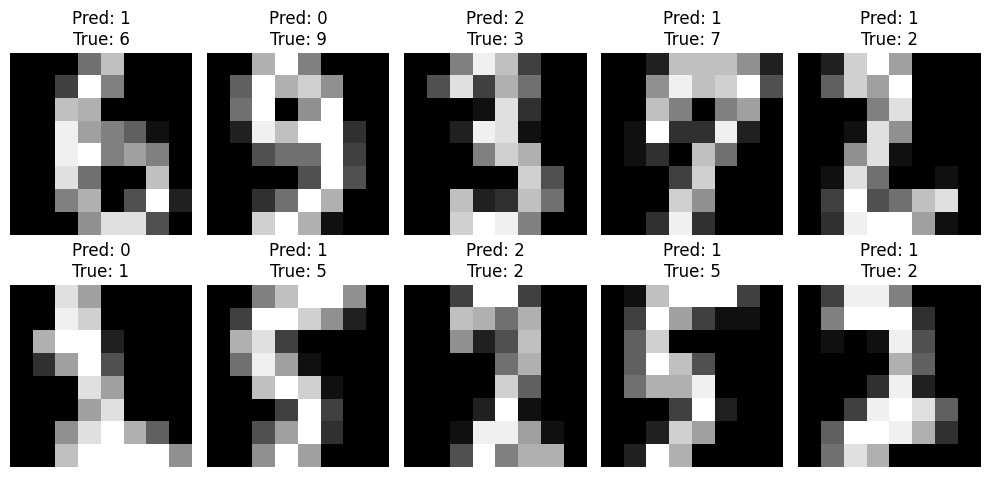

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(8, 8), cmap="gray")  # digits dataset has 8x8 images
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
clf.score(X_test , y_test)

0.9694444444444444

In [ ]:
from sklearn.metrics import accuracy_score ,  confusion_matrix
import seaborn as sns

In [ ]:
print(accuracy_score(y_test , y_predict))

0.9694444444444444


In [ ]:
cm = confusion_matrix(y_test , y_predict)

In [ ]:
print(cm)

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


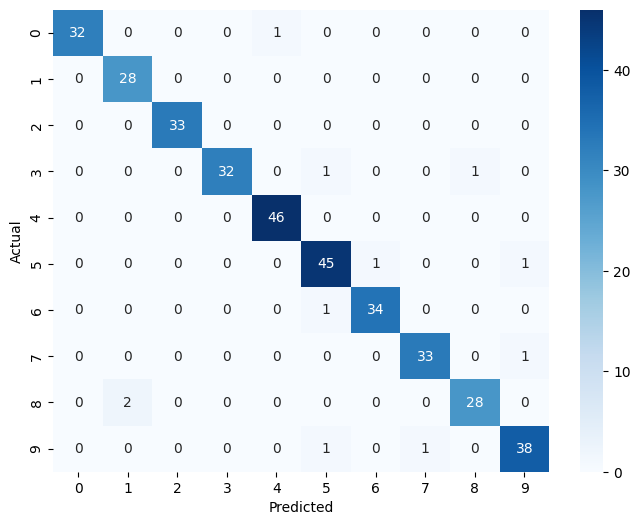

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Digit 0: Error Rate = 3.03%
Digit 1: Error Rate = 0.00%
Digit 2: Error Rate = 0.00%
Digit 3: Error Rate = 5.88%
Digit 4: Error Rate = 0.00%
Digit 5: Error Rate = 4.26%
Digit 6: Error Rate = 2.86%
Digit 7: Error Rate = 2.94%
Digit 8: Error Rate = 6.67%
Digit 9: Error Rate = 5.00%


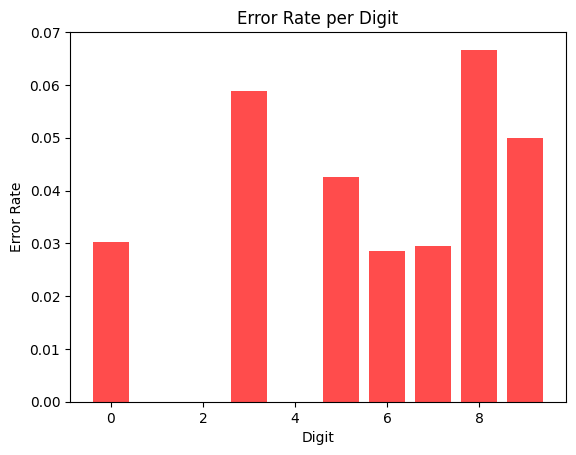

In [ ]:
errors = {}

for digit in range(10):
    total = cm[digit].sum()        # total actual occurrences of this digit
    correct = cm[digit][digit]     # correctly predicted
    wrong = total - correct        # misclassified
    error_rate = wrong / total     # fraction of mistakes
    errors[digit] = error_rate
for digit, rate in errors.items():
    print(f"Digit {digit}: Error Rate = {rate:.2%}")

# Visualize error rates
plt.bar(errors.keys(), errors.values(), color="red", alpha=0.7)
plt.xlabel("Digit")
plt.ylabel("Error Rate")
plt.title("Error Rate per Digit")
plt.show()